In [236]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
import pickle
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report


In [237]:
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]

# Set path to the dataset directory
dataset_path = r'C:\Users\relax\Documents\belajar-python\ComputerVision\Studi_kasus1\arsip'

# Get a list of all image paths in the dataset directory
image_paths = imglist(dataset_path)

# Print the list of image paths
print(image_paths)

['C:\\Users\\relax\\Documents\\belajar-python\\ComputerVision\\Studi_kasus1\\arsip\\jokowi', 'C:\\Users\\relax\\Documents\\belajar-python\\ComputerVision\\Studi_kasus1\\arsip\\Megawati_Sukarnoputri', 'C:\\Users\\relax\\Documents\\belajar-python\\ComputerVision\\Studi_kasus1\\arsip\\ravanelli']


In [238]:
# Load data
train_path = os.path.join('C:/Users/relax/miniconda3/envs/snowflakes/Dataset')
training_names = os.listdir(train_path) 

image_paths = []
image_classes = []
class_id = 0

for training_name in training_names:
    if not os.path.isdir(os.path.join(train_path, training_name)):
        raise ValueError(f"{os.path.join(train_path, training_name)} bukan direktori")

    class_path = imglist(os.path.join(train_path, training_name))
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path)
    class_id+=1

# Shuffle data
random.shuffle(image_paths)


In [239]:
print (image_paths)

['C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\jokowi\\jok.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\jokowi\\Joko-Widodo-1.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\ravanelli\\1.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\jokowi\\joko04.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\Megawati_Sukarnoputri\\Megawati_Sukarnoputri_0001.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\ravanelli\\2.jpeg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\Megawati_Sukarnoputri\\Megawati_Sukarnoputri_0005.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\Megawati_Sukarnoputri\\Megawati_Sukarnoputri_0004.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\Megawati_Sukarnoputri\\Megawati_Sukarnoputri_0002.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\jokowi\\jo.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\ravanelli\\5.jpg', 'C:/Users/relax/miniconda3/envs/snowflakes/Dataset\\ravanelli

In [240]:
X_train, X_test, y_train, y_test = train_test_split(image_paths, image_classes, test_size=0.25, random_state=42)

# Print data
print(f"Jumlah data train: {len(X_train)}")
print(f"Jumlah data test: {len(X_test)}")

Jumlah data train: 9
Jumlah data test: 3


In [241]:
# Konversi y_train ke tipe numerik
y_train = np.asarray(y_train)

In [242]:
# Tampilkan gambar dari dataset
for image_path, des in des_list:
    im = cv2.imread(image_path)

    # Gambar titik-titik keypoint
    for kp in kpts:
        # Konversi nilai kp.pt ke integer
        center = (int(kp.pt[0]), int(kp.pt[1]))

        # Gambar lingkaran pada titik keypoint
        cv2.circle(im, center, 5, (0, 255, 0), -1)

    cv2.imshow('Gambar', im)
    cv2.waitKey(0)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [243]:
# Inisialisasi variabel untuk menyimpan deskriptor dari Algoritma SIFT
des_list = []

# Buat Fitur Ekstraksi dan Objek Deteksi Keypoints
sift = cv2.SIFT_create()
for image_path in image_paths:
    im = cv2.imread(image_path) # Membaca Citra berdasarkan PATH yang telah dibuat sebelumnya
    kpts, des = sift.detectAndCompute(im, None)
    des_list.append((image_path, des))   # Menyimpan fitur yang telah dideteksi kedalam variabel des_list=[]

In [224]:
# Tambahkan loop untuk menambahkan descriptor ke variabel descriptors
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
   descriptors = np.vstack((descriptors, descriptor))  

descriptors_float = descriptors.astype(float)  # K-Means hanya bekerja pada tipe data float, Convert descriptor ke float

In [225]:
# Konversi deskriptor ke float
descriptors_float = np.vstack([des for image_path, des in des_list])

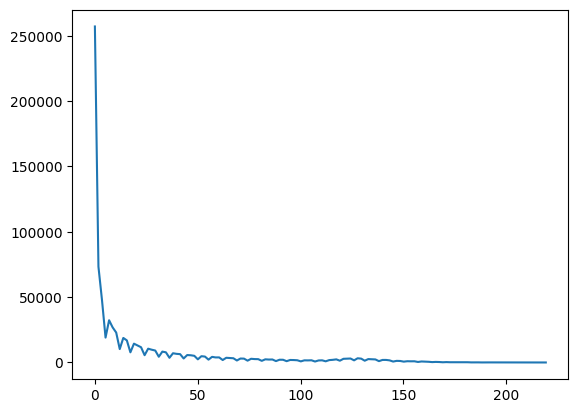

In [226]:
# Hitung histogram dari deskriptor
bins = 128
hist = np.histogram(descriptors_float, bins=bins)

# Tampilkan histogram
plt.plot(hist[1][:-1], hist[0])
plt.show()

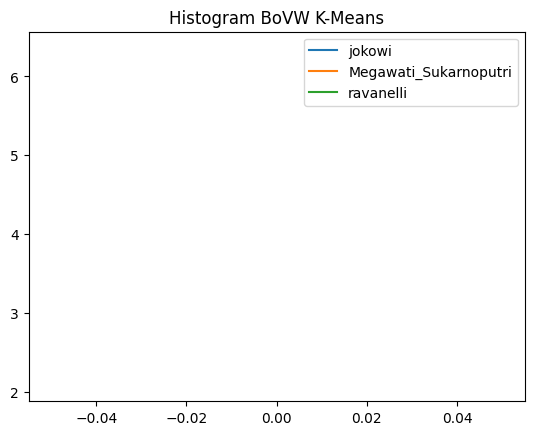

In [227]:
k = 150  
voc, variance = kmeans(descriptors_float, k, 1) 

# Penghitungan histo BoVW
im_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1

# Menampilkan histogram
plt.title("Histogram BoVW K-Means")
plt.plot(np.mean(im_features[0], axis=0), label="jokowi")
plt.plot(np.mean(im_features[1], axis=0), label="Megawati_Sukarnoputri")
plt.plot(np.mean(im_features[2], axis=0), label="ravanelli")
plt.legend()
plt.show()

Error: list index out of range


C:\Users\relax\miniconda3\envs\snowflakes\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\relax\miniconda3\envs\snowflakes\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


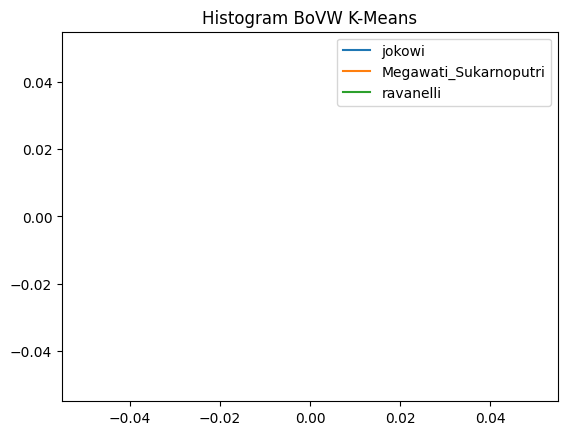

In [228]:
# Gunakan K-Means untuk Melakukan perhitungan Histogram (BoVW)
k = 150  
voc, variance = kmeans(descriptors_float, k, 1) 

#Penghitungan histo BoVW
im_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1
# Pengelompokan histogram
try:
    hist_jokowi = []
    hist_megawati = []
    hist_ravanelli = []

    for i in range(len(image_paths)):
        if image_paths[i].split('/')[-2] == 'jokowi':
            hist_jokowi.append(im_features[i])
        elif image_paths[i].split('/')[-2] == 'Megawati_Sukarnoputri':
            hist_megawati.append(im_features[i])
        else:
            if image_paths[i].split('/')[-2] == 'ravanelli':
                hist_ravanelli.append(im_features[i])
except IndexError:
    print('Error: list index out of range')

# Tampilkan histogram
plt.title('Histogram BoVW K-Means')
plt.plot(np.mean(hist_jokowi, axis=0), label='jokowi')
plt.plot(np.mean(hist_megawati, axis=0), label='Megawati_Sukarnoputri')
plt.plot(np.mean(hist_ravanelli, axis=0), label='ravanelli')
plt.legend()
plt.show()

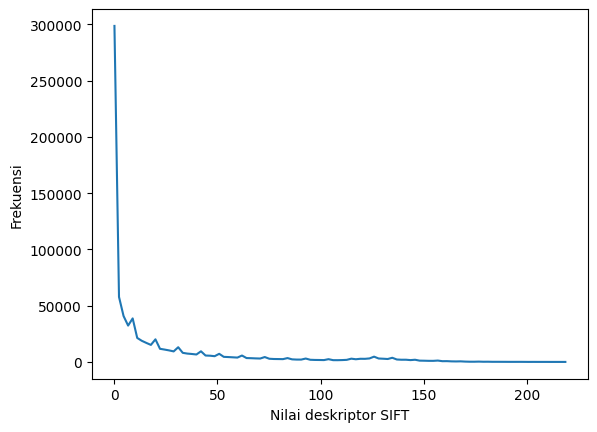

(array([298621,  57759,  40804,  32304,  38676,  21311,  18783,  16902,
        15125,  20081,  11663,  10979,  10233,   9352,  13055,   8076,
         7415,   7052,   6605,   9438,   5685,   5522,   5099,   7205,
         4513,   4320,   4094,   3860,   5687,   3431,   3315,   3136,
         3020,   4335,   2822,   2596,   2543,   2483,   3412,   2285,
         2090,   2074,   3003,   1908,   1762,   1711,   1634,   2440,
         1569,   1549,   1645,   1843,   2889,   2377,   2789,   2749,
         3099,   4685,   3045,   2840,   2595,   3680,   2153,   1942,
         1955,   1616,   1938,   1142,   1071,    963,    951,   1207,
          658,    694,    500,    428,    511,    292,    188,    183,
          283,    154,    182,    101,    104,     91,     77,     55,
           57,     67,     48,     16,     33,     19,     19,     15,
            0,      4,      3,      3], dtype=int64), array([  0.  ,   2.21,   4.42,   6.63,   8.84,  11.05,  13.26,  15.47,
        17.68,  19.89,

In [229]:
# Hitung histogram dari deskriptor SIFT
histogram = np.histogram(descriptors_float, bins=100)

# Plot histogram
plt.plot(histogram[1][:-1], histogram[0])
plt.xlabel("Nilai deskriptor SIFT")
plt.ylabel("Frekuensi")
plt.show()
# Cetak histogram
print(histogram)


In [234]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, max_iter=500)
clf.fit(X_train, np.array(y_train))

# Lakukan prediksi pada data uji
y_pred = clf.predict(X_test)
# Mencetak laporan klasifikasi
report = classification_report(y_test, y_pred)
print(report)

#Simpan Model Sistem Klasifikasi kedalam bentuk Pickel
filename = "svm_model_SIFT.pkl"
with open(filename, "wb") as f:
    pickle.dump(knn, f)

ValueError: could not convert string to float: 'C:\\Users\\relax\\Documents\\belajar-python\\ComputerVision\\Studi_kasus1\\arsip\\Megawati_Sukarnoputri\\Megawati_Sukarnoputri_0005.jpg'